C:\Users\CGC\AppData\Local\Temp\ipykernel_34512\2893221163.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  ax1.contour(xx, yy, Z_numpy, colors='r', linestyles='dashed', label='NumPy Perceptron')
C:\Users\CGC\AppData\Local\Temp\ipykernel_34512\2893221163.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.contour(xx, yy, Z_sklearn, colors='b', linestyles='dashed', label='Scikit-learn Perceptron')


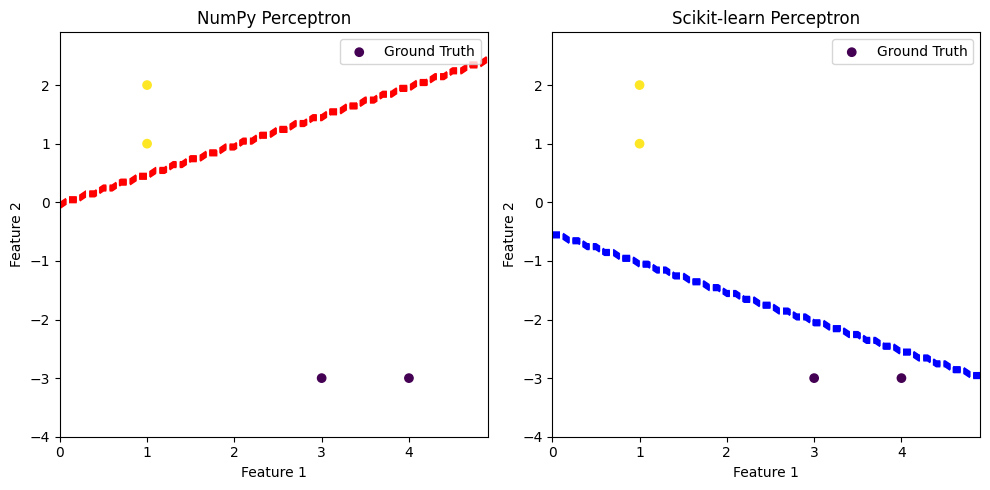

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# 创建数据
samples = np.array([[3, -3], [4, -3], [1, 1], [1, 2]])
labels = np.array([-1, -1, 1, 1])

# 使用NumPy实现感知器
class NumpyPerceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, sample):
        activation = np.dot(sample, self.weights) + self.bias
        return 1 / (1 + np.exp(-activation))

    def train(self, samples, labels, num_epochs=10, learning_rate=1):
        for epoch in range(num_epochs):
            for sample, label in zip(samples, labels):
                prediction = self.predict(sample)
                if prediction != label:
                    self.weights += learning_rate * label * sample
                    self.bias += learning_rate * label

# 使用NumPy实现感知器进行训练
numpy_perceptron = NumpyPerceptron(num_features=samples.shape[1])
numpy_perceptron.train(samples, labels)

# 使用Scikit-learn的Perceptron进行训练
sklearn_perceptron = Perceptron()
sklearn_perceptron.fit(samples, labels)

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 绘制数据点和决策边界（NumPy感知器）
ax1.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', label='Ground Truth')

x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z_numpy = numpy_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numpy = np.where(Z_numpy > 0.5, 1, -1)
Z_numpy = Z_numpy.reshape(xx.shape)
ax1.contour(xx, yy, Z_numpy, colors='r', linestyles='dashed', label='NumPy Perceptron')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.set_title('NumPy Perceptron')

# 绘制数据点和决策边界（Sklearn感知器）
ax2.scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', label='Ground Truth')

Z_sklearn = sklearn_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = np.where(Z_sklearn > 0.5, 1, -1)
Z_sklearn = Z_sklearn.reshape(xx.shape)
ax2.contour(xx, yy, Z_sklearn, colors='b', linestyles='dashed', label='Scikit-learn Perceptron')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.set_title('Scikit-learn Perceptron')

plt.tight_layout()
plt.show()